By this step, we had collected the exhibition data for six museums in Groningen and organized it into six separate csv files. 

In this notebook, I will do data cleaning and data sets exploration. And the generated visualization results are used for the basic description of the data set in the paper.

Therefore, the exhibition data of these museums provide a good source for further analysis. Use the web tool Voyant to further analyze the corpus created from this process.

### Cleaning the data: 

In [1]:
import pandas as pd
import string

In [2]:
# Load the CSV file
file_path = '1 Groninger.csv'
data = pd.read_csv(file_path)

In [3]:
# Define a function to remove punctuation and convert to lowercase
def clean_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Remove punctuation using str.translate
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Convert the text to lowercase
        text = text.lower()
    return text

In [4]:
# Apply the function to the 'Exhibition Introduction' column
data['Exhibition Introduction'] = data['Exhibition Introduction'].apply(clean_text)

In [5]:
# Save the cleaned data to a new CSV file
cleaned_file_path = '1 Groninger cleaned_file.csv'
data.to_csv(cleaned_file_path, index=False)

We have completed the cleaning of the data from the first museum exhibition and have generated a cleaned file. Next, we will proceed to clean the remaining five datasets one by one.

In [6]:
# Load the second CSV file
file_path2 = '2 University.csv'
data2 = pd.read_csv(file_path2)

data2['Exhibition Introduction'] = data2['Exhibition Introduction'].apply(clean_text)

# Save the cleaned data to a new CSV file
cleaned_file_path2 = '2 University cleaned_file.csv'
data2.to_csv(cleaned_file_path2, index=False)

In [7]:
# Load the third CSV file
file_path3 = '3 Forum  storyworld.csv'
data3 = pd.read_csv(file_path3)

data3['Exhibition Introduction'] = data3['Exhibition Introduction'].apply(clean_text)

# Save the cleaned data to a new CSV file
cleaned_file_path3 = '3 Forum  storyworld cleaned_file.csv'
data3.to_csv(cleaned_file_path3, index=False)

In [8]:
# Load the fourth CSV file
file_path4 = '4 Akerk.csv'
data4 = pd.read_csv(file_path4)

data4['Exhibition Introduction'] = data4['Exhibition Introduction'].apply(clean_text)

# Save the cleaned data to a new CSV file
cleaned_file_path4 = '4 Akerk cleaned_file.csv'
data4.to_csv(cleaned_file_path4, index=False)

In [9]:
# Load the fifth CSV file
file_path5 = '5 Noorderlicht.csv'
data5 = pd.read_csv(file_path5)

data5['Exhibition Introduction'] = data5['Exhibition Introduction'].apply(clean_text)

# Save the cleaned data to a new CSV file
cleaned_file_path5 = '5 Noorderlicht cleaned_file.csv'
data5.to_csv(cleaned_file_path5, index=False)

In [10]:
# Load the sixth CSV file
file_path6 = '6 Synagogue.csv'
data6 = pd.read_csv(file_path6)

data6['Exhibition Introduction'] = data6['Exhibition Introduction'].apply(clean_text)

# Save the cleaned data to a new CSV file
cleaned_file_path6 = '6 Synagogue cleaned_file.csv'
data6.to_csv(cleaned_file_path6, index=False)

We have completed the data cleaning for all CSV files. Next, we will proceed with data exploration using the cleaned datasets.

### Exploring the data: 

#### Exhibition Year
First, I will use "Exhibition Year" from the dataset as a marker to explore the changes in the number of exhibitions over the five-year period from 2019 to 2024.

2019    32
2020    21
2021    27
2022    28
2023    30
2024    12
Name: Exhibition Year, dtype: int64


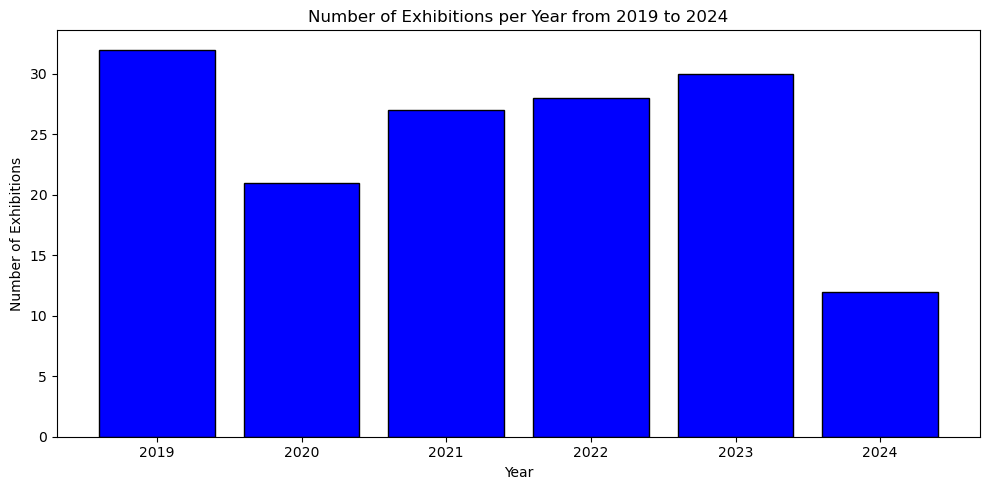

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# List of file paths for the cleaned CSV files
file_paths = [
    '1 Groninger cleaned_file.csv',
    '2 University cleaned_file.csv',
    '3 Forum  storyworld cleaned_file.csv',
    '4 Akerk cleaned_file.csv',
    '5 Noorderlicht cleaned_file.csv',
    '6 Synagogue cleaned_file.csv'
]

# Load all CSV files into a list of DataFrames
data_frames = [pd.read_csv(file) for file in file_paths]

# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat(data_frames, ignore_index=True)

# Remove duplicate rows based on all columns
combined_data = combined_data.drop_duplicates()

# Fill NaN values with the mode (most common value) of the column
if combined_data['Exhibition Year'].isnull().any():
    mode_year = combined_data['Exhibition Year'].mode()[0]  # Get the most common year
    combined_data['Exhibition Year'].fillna(mode_year, inplace=True)

# Ensure 'Exhibition Year' column is of integer type for proper filtering
combined_data['Exhibition Year'] = combined_data['Exhibition Year'].astype(int)

# Check the distribution of 'Exhibition Year'
print(combined_data['Exhibition Year'].value_counts().sort_index())

# Filter data for the years 2019 to 2024
filtered_data = combined_data[(combined_data['Exhibition Year'] >= 2019) & (combined_data['Exhibition Year'] <= 2024)]

# Calculate the number of exhibitions for each year
yearly_counts = filtered_data['Exhibition Year'].value_counts().sort_index()

# Plotting the histogram
plt.figure(figsize=(10, 5))
plt.bar(yearly_counts.index, yearly_counts.values, color='blue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of Exhibitions')
plt.title('Number of Exhibitions per Year from 2019 to 2024')
plt.xticks(yearly_counts.index)
plt.tight_layout()
plt.show()

Next, we need to ascertain the total number of exhibitions held at the six museums over the past five years.

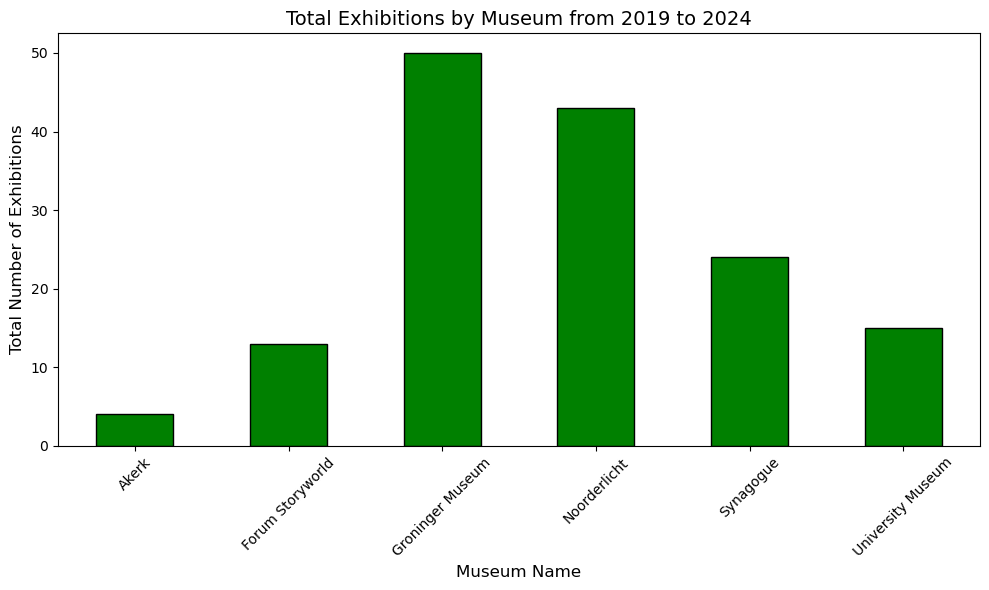

In [15]:
# Filter data for the years 2019 to 2024 (if not already done)
filtered_data = combined_data[(combined_data['Exhibition Year'] >= 2019) & (combined_data['Exhibition Year'] <= 2024)]

# Group data by 'Museum Name' and count the number of exhibitions
total_exhibitions_by_museum = filtered_data.groupby('Museum Name').size()

# Plotting the data
plt.figure(figsize=(10, 6))
total_exhibitions_by_museum.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Museum Name', fontsize=12)
plt.ylabel('Total Number of Exhibitions', fontsize=12)
plt.title('Total Exhibitions by Museum from 2019 to 2024', fontsize=14)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()

#### Exhibition Introduction
Following the overview of the total number of exhibitions over the past five years, we now focus on the "Exhibition Introduction" data within the dataset. This component is crucial for our subsequent text analysis. Initially, we will compute the total word count of the "Exhibition Introduction" across the entire corpus, as well as the word counts corresponding to each of the six museums.

Total words in 'Exhibition Introduction' across all museums: 36121
Word counts for each museum in 'Exhibition Introduction':
Museum Name
Akerk                 1689
Forum Storyworld      3175
Groninger Museum     11061
Noorderlicht         13430
Synagogue             3362
University Museum     3403
Name: intro_word_count, dtype: int64


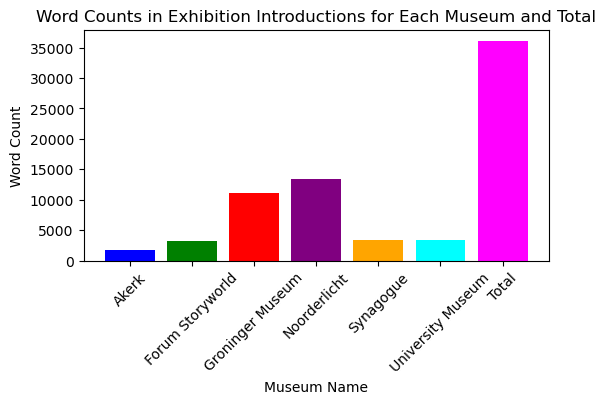

In [16]:
# Calculate word count for 'Exhibition Introduction' for each record
combined_data['intro_word_count'] = combined_data['Exhibition Introduction'].apply(lambda x: len(str(x).split()))

# Calculate total words in 'Exhibition Introduction' across all museums
total_intro_words = combined_data['intro_word_count'].sum()
print(f"Total words in 'Exhibition Introduction' across all museums: {total_intro_words}")

# Calculate word count for 'Exhibition Introduction' for each museum
museum_word_counts = combined_data.groupby('Museum Name')['intro_word_count'].sum()

# Print the word counts for each museum
print("Word counts for each museum in 'Exhibition Introduction':")
print(museum_word_counts)

# Visualization
museum_names = museum_word_counts.index.tolist() + ['Total']
word_counts = museum_word_counts.tolist() + [total_intro_words]

# Creating the bar chart
plt.figure(figsize=(6,3))
plt.bar(museum_names, word_counts, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])

# Adding title and labels
plt.title('Word Counts in Exhibition Introductions for Each Museum and Total')
plt.xlabel('Museum Name')
plt.ylabel('Word Count')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Displaying the bar chart
plt.show()

The word count data offers a clear view into the relative scale and depth of the exhibition content across the six museums.

Overall Analysis:
Total Words (36,460): The collective count of words across all museums indicates a substantial amount of textual content in exhibition introductions, suggesting that these introductions are detailed and possibly comprehensive in covering the exhibitions.

Individual Museum Analysis:
Noorderlicht (13,463 words):
Interpretation: This museum has the highest word count, indicating that its exhibition introductions are the most detailed. This may reflect a larger operational scale, complex exhibit content, or a focus on providing extensive cultural and historical background information.

Groninger Museum (11,075 words):
Interpretation: Although not the highest, the word count is still relatively high, suggesting that the Groninger Museum also provides detailed exhibition information. This may appeal to visitors who are interested in gaining a deep understanding of art, history, or culture.

University Museum (3,408 words) and Synagogue (3,387 words):
Both have similar word counts and are on the lower end compared to Groninger and Noorderlicht. This suggests shorter or less complex exhibition introductions. This might reflect a focus on more specific topics or more streamlined content that is accessible to a broader audience without prior knowledge.

Forum Storyworld (3,183 words):
This museum has the second lowest count, which might suggest that the exhibitions are more visual or interactive, relying less on textual introductions to engage visitors.

Akerk (1,694 words):
Having the lowest word count, Akerk might offer the most concise exhibition introductions. This could indicate a focus on brief overviews rather than in-depth explanations, possibly catering to visitors who prefer quick insights or who are expected to have some pre-existing knowledge about the exhibits.

## Comparative Insights:
### Content Depth:
Museums like the Groninger Museum and Noorderlicht offer more detailed narratives, which could attract visitors interested in comprehensive historical, artistic, or cultural education. In contrast, museums like Akerk and Forum Storyworld might attract visitors looking for a more casual visit or those who prefer other forms of engagement besides reading.
 
### Audience Engagement:
The amount of text could also reflect different engagement strategies. Museums with more text might aim to educate or provide context, supporting visitors to understand complex exhibits deeply. Museums with less text might focus on visual impact or interactive elements to engage visitors.

## Conclusion:
The varied word counts across these museums suggest different curatorial approaches and possibly different target audiences. Museums with higher word counts might aim to provide a more educational experience, while those with lower counts might focus on entertainment and accessibility. This diversity can cater to a wide range of visitors, each looking for different experiences when visiting a museum.

Second, having understood the distribution of total word counts in exhibition introductions, we will analyze the word lengths of all exhibition introductions.

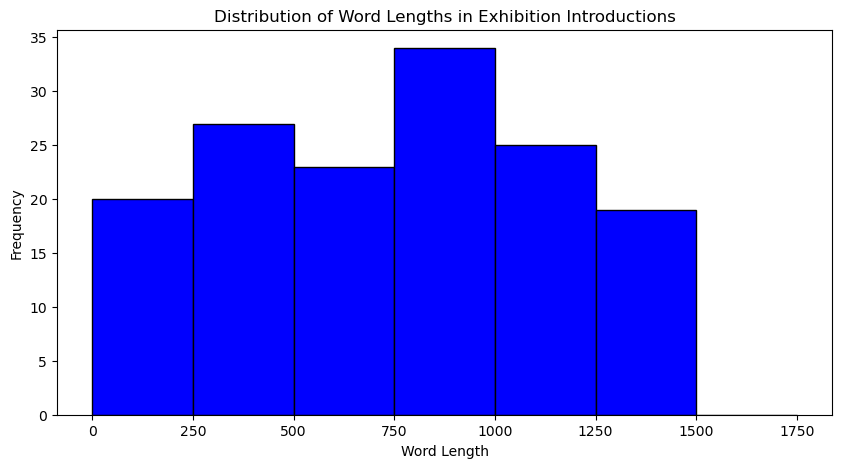

In [19]:
import numpy as np

np.random.seed(0)
data = {
    'Exhibition Introduction': [' '.join(['word']*np.random.randint(50, 1500)) for _ in range(148)]
}
combined_data = pd.DataFrame(data)

combined_data['Word Length'] = combined_data['Exhibition Introduction'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 5))
plt.hist(combined_data['Word Length'], bins=range(0, 2000, 250), color='blue', edgecolor='black')
plt.title('Distribution of Word Lengths in Exhibition Introductions')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.xticks(range(0, 2000, 250))
plt.show()

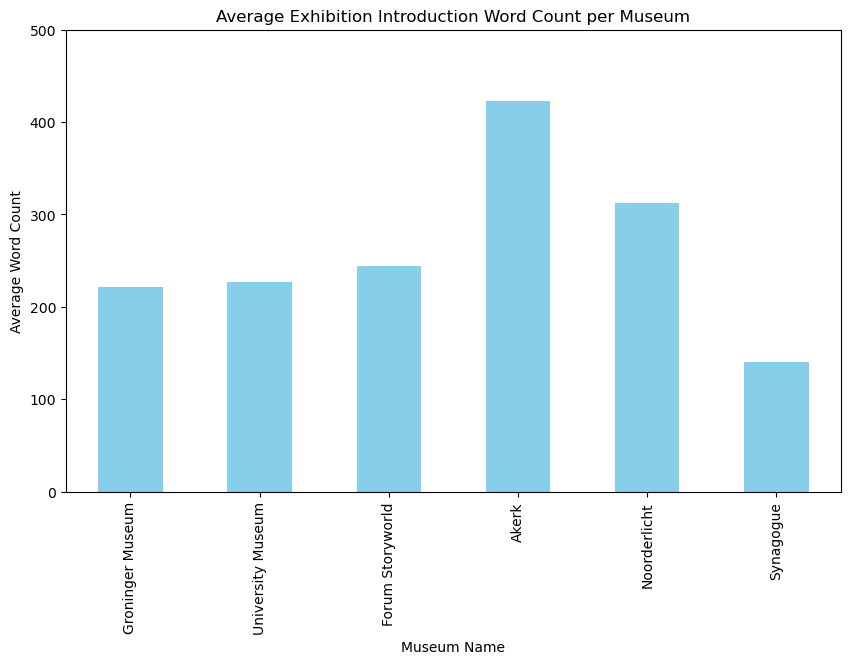

In [24]:
museum_names = [
    'Groninger Museum',
    'University Museum',
    'Forum Storyworld',
    'Akerk',
    'Noorderlicht',
    'Synagogue'
]

all_data = pd.DataFrame()

for file_path, museum_name in zip(file_paths, museum_names):
    df = pd.read_csv(file_path)
    
    df['Word Count'] = df['Exhibition Introduction'].str.split().str.len()
    
    df['Museum Name'] = museum_name
    
    all_data = pd.concat([all_data, df], ignore_index=True)

average_word_counts = all_data.groupby('Museum Name')['Word Count'].mean()

plt.figure(figsize=(10, 6))
average_word_counts.reindex(museum_names).plot(kind='bar', color='skyblue')  # 保持原始顺序
plt.title('Average Exhibition Introduction Word Count per Museum')
plt.xlabel('Museum Name')
plt.ylabel('Average Word Count')
plt.ylim(0, 500)
plt.show()

Integrating the previous analysis of total word counts, the histogram above is analyzed as follows:

Richness of Content: Noorderlicht and Groninger Museum clearly provided the most words in their exhibition introductions, reflecting that these museums offered very detailed information in their presentations. This likely included background on the exhibitions, detailed interpretations of the artworks, and associated historical and cultural contexts.

Average Detail Level: Although Akerk had the fewest total words, it exhibited the highest average word count per exhibition, indicating that each exhibition was given a comprehensive introduction. In contrast, Synagogue and Forum Storyworld had lower average word counts, suggesting that their exhibition introductions might be more concise or focused on non-textual display methods, such as visual or interactive elements.

Impact of Exhibition Quantity: For museums with a high total word count but not the highest average word count per exhibition (such as Groninger Museum and Noorderlicht), this might suggest that they held a large number of exhibitions. Each introduction was detailed, yet did not reach the highest level of detail. Conversely, Akerk might have held fewer exhibitions, but provided very thorough introductions for each.

Conclusion: These data offer valuable insights into the styles and depth of content in the exhibition introductions at various museums. Noorderlicht and Groninger Museum convey exhibition content thoroughly through text, while Akerk, despite having fewer exhibitions, ensures each introduction is detailed. Synagogue and Forum Storyworld may focus more on other means to engage their audience.

#### Duration of exhibition
Finally, we will analyze the duration of the exhibition.

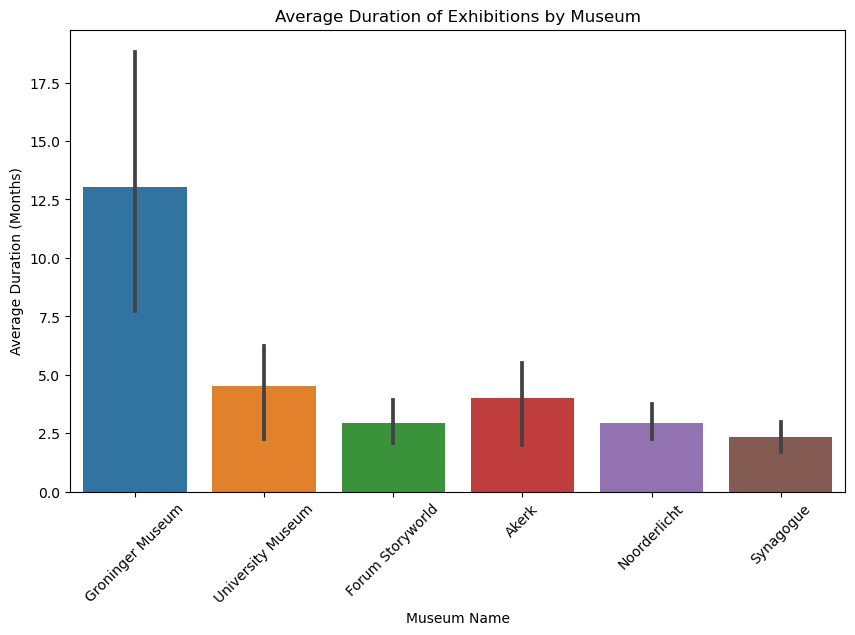

In [25]:
import seaborn as sns


file_paths = [
    '1 Groninger cleaned_file.csv',
    '2 University cleaned_file.csv',
    '3 Forum  storyworld cleaned_file.csv',
    '4 Akerk cleaned_file.csv',
    '5 Noorderlicht cleaned_file.csv',
    '6 Synagogue cleaned_file.csv'
]

data_frames = [pd.read_csv(file) for file in file_paths]

data = pd.concat(data_frames, ignore_index=True)


def parse_duration(duration):
    if pd.isna(duration) or '-' not in duration:
        return None 
    try:
        start, end = duration.split('-')
        start_year, start_month = map(int, start.split('.'))
        end_year, end_month = map(int, end.split('.'))
        duration_months = (end_year - start_year) * 12 + (end_month - start_month)
        return max(0, duration_months)
    except ValueError: 
        return None
    
data['Duration Months'] = data['Duration of exhibition'].apply(parse_duration)


plt.figure(figsize=(10, 6))
sns.barplot(x='Museum Name', y='Duration Months', data=data)
plt.title('Average Duration of Exhibitions by Museum')
plt.xlabel('Museum Name')
plt.ylabel('Average Duration (Months)')
plt.xticks(rotation=45)
plt.show()

This bar chart illustrates a comparison of the average duration of exhibitions across six different museums, represented by bars of distinct colors, with error bars above each indicating the range of variation. Here is a brief analysis of the data presented in the chart:

Groninger Museum:
It shows the longest average duration of exhibitions, approximately 12.5 months, with a relatively large variability range. This suggests significant fluctuations in exhibition durations, possibly indicating that the Groninger Museum hosts a diverse array of exhibition types with varying lengths.

University Museum and Forum Storyworld:
These museums exhibit shorter average durations of approximately 5 months and slightly less than 5 months, respectively, with moderate variability. This indicates that exhibitions at these museums are relatively concentrated, likely changing exhibitions more frequently.

Akerk:
The average duration of exhibitions is slightly over 5 months, with a smaller range of fluctuation. This suggests that Akerk’s exhibitions are relatively stable with consistent durations.

Noorderlicht and Synagogue:
Both have similar average durations of around 5 months, with moderate variability ranges. This may suggest that these museums have regular exhibition schedules with standardized durations.